# Data Science Challenge
Alejandra Neely

### 1. ¿Cómo se distribuyen los datos? ¿Qué te llama la atención o cuál es tu conclusión sobre esto?

In [63]:
# Importamos los datos
import pandas as pd
df = pd.read_csv('dataset_SCL.csv')
df.head()

/var/folders/5h/wp2by60x2pv7d9tm1_cb98jc0000gn/T/ipykernel_73989/2935201456.py:2: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset_SCL.csv')


,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


In [64]:
# Obtenemos el tamaño inicial del dataset
df.shape

(68206, 18)

In [65]:
# Revisamos los nulos
df.isnull().sum()

Fecha-I      0
Vlo-I        0
Ori-I        0
Des-I        0
Emp-I        0
Fecha-O      0
Vlo-O        1
Ori-O        0
Des-O        0
Emp-O        0
DIA          0
MES          0
AÑO          0
DIANOM       0
TIPOVUELO    0
OPERA        0
SIGLAORI     0
SIGLADES     0
dtype: int64

In [66]:
# Hay un nulo, miramos qué otros valores hay en esa fila
df[df['Vlo-O'].isnull()]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima


In [67]:
df['Vlo-O'].dtype

dtype('O')

In [68]:
len(df['Vlo-O'].unique())

867

In [69]:
min(pd.to_numeric(df['Vlo-O'], errors = 'coerce'))

1.0

In [70]:
max(pd.to_numeric(df['Vlo-O'], errors = 'coerce'))

9956.0

In [71]:
df = df[df['Vlo-O'].notnull()]
# Confirmamos que realmente disminuimos una sola fila
df.shape

(68205, 18)

Al revisar la cantidad de nulos por cada variable, detectamos un solo nulo en la variable que indica el número de vuelo de operación del vuelo (Vlo-O). No queda muy claro el significado de esta variable, por eso fue necesario indagar un poco más. Es una variable categórica, que puede adoptar 867 valores que van entre el 1 y 9956. Como desconocemos si estos número tienen algún peso, no tenemos información suficiente como para decidir imputar, y al ser un solo caso dentro de 68206, eliminaremos la fila.

In [72]:
# Inspeccionamos el rango de fechas
df.groupby(['AÑO', 'MES']).size()

AÑO   MES
2017  1      6105
      2      5561
      3      5482
      4      5020
      5      5240
      6      4981
      7      5992
      8      5744
      9      5610
      10     6032
      11     6080
      12     6356
2018  1         2
dtype: int64

In [74]:
# Inspeccionamos la cantidad de ciudades de origen, todos los vuelos son provenientes del aeropuerto de Santiago
df.groupby(['SIGLAORI']).size()


SIGLAORI
Santiago    68205
dtype: int64

In [75]:
# obtenemos la cantidad de ciudades de destino
len(df['SIGLADES'].unique())

62

/var/folders/5h/wp2by60x2pv7d9tm1_cb98jc0000gn/T/ipykernel_73989/4141328448.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


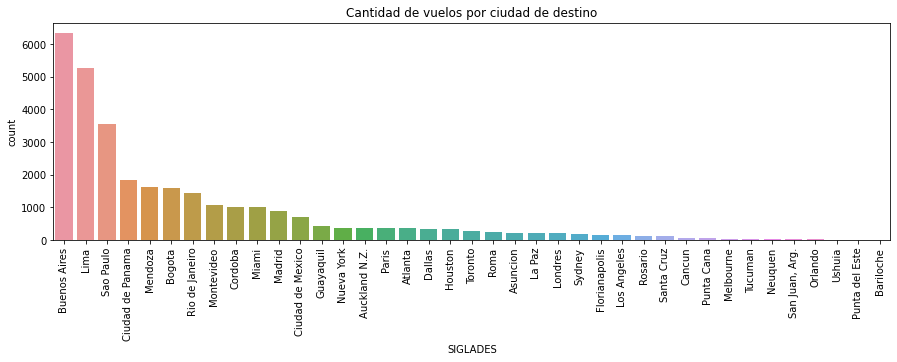

In [138]:
# Revisamos cómo se distribuye la cantidad de vuelos entre ciudades de destino
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
ax = sns.countplot(x="SIGLADES", 
    data= df[df['TIPOVUELO'] == 'I'],
    order=df[df['TIPOVUELO'] == 'I']['SIGLADES'].value_counts().index).set(title='Cantidad de vuelos por ciudad de destino')
#ax.tick_params(axis='x', rotation=90)
fig.set_figwidth(15)
plt.xticks(rotation=90)
fig.show()


/var/folders/5h/wp2by60x2pv7d9tm1_cb98jc0000gn/T/ipykernel_73989/2508778237.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


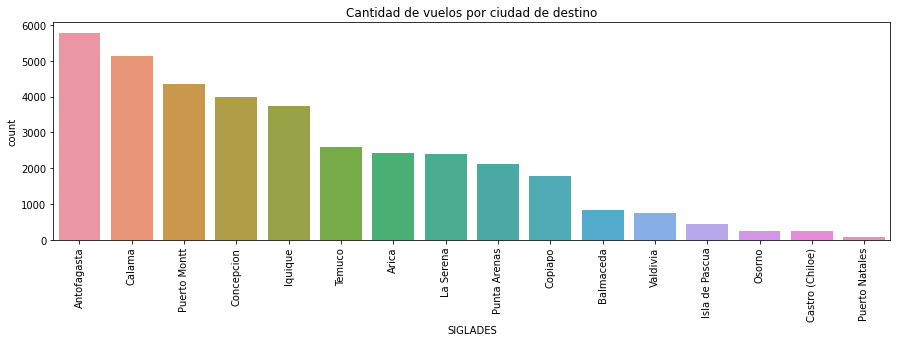

In [140]:
# Para observar mejor, separamos las ciudades internacionales de las nacionales
# Cantidad de vuelos por ciudades nacionales de destino

fig, ax = plt.subplots()
ax = sns.countplot(x="SIGLADES", 
    data= df[df['TIPOVUELO'] == 'N'],
    order=df[df['TIPOVUELO'] == 'N']['SIGLADES'].value_counts().index).set(title='Cantidad de vuelos por ciudad nacional de destino')
fig.set_figwidth(15)
plt.xticks(rotation=90)
fig.show()

También vale la pena explorar la distribución según aerolínea que opera el vuelo, donde vemos que las 5 aerolíneas que operan los vuelos con más frecuencia son LATAM, Sky Airline, Aerolíneas Argentinas, Copa Air y Latin American Wings; luego le siguen Avianca y JetSmart SPA que también son bastantes conocidas. 
Este resultado se condice con la mayor frecuencia de vuelos con destinos nacionales y dentro del continente, ya que son aerolíneas que operan mayoritariamente vuelos dentro de Sud América.

/var/folders/5h/wp2by60x2pv7d9tm1_cb98jc0000gn/T/ipykernel_73989/2027433848.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


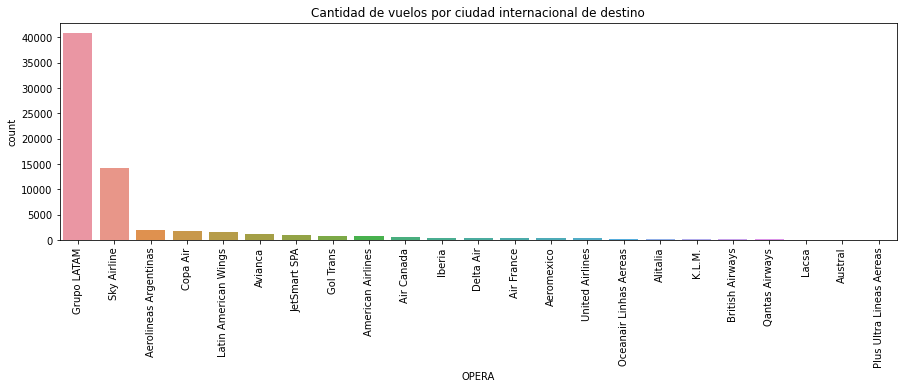

In [142]:
fig, ax = plt.subplots()
ax = sns.countplot(x="OPERA", 
    data= df,
    order=df['OPERA'].value_counts().index).set(title = 'Cantidad de vuelos por ciudad internacional de destino')
fig.set_figwidth(15)
plt.xticks(rotation=90)
fig.show()

/var/folders/5h/wp2by60x2pv7d9tm1_cb98jc0000gn/T/ipykernel_73989/1412665202.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


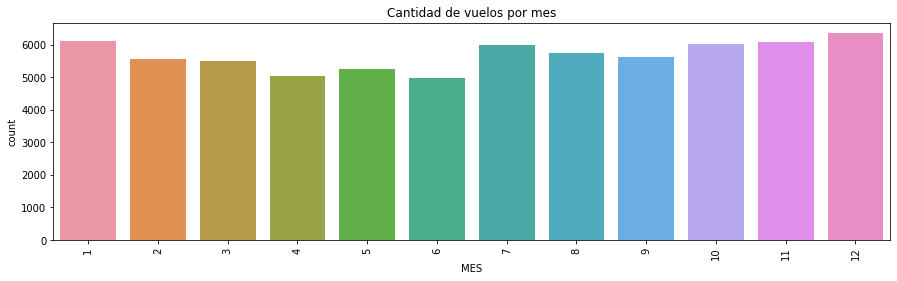

In [144]:
fig, ax = plt.subplots()
ax = sns.countplot(x="MES",
    data= df).set(title = 'Cantidad de vuelos por mes')
fig.set_figwidth(15)
plt.xticks(rotation=90)
fig.show()

Otra distribución necesaria de inspeccionar es el tiempo, es decir cuántos vuelos operan cada mes, y cada día de la semana. Podría ser por ejemplo, que las rutas asociadas a placer operen más durante los fines de la semana y en temporadas de vacaciones, mientras que las rutas asociadas a negocios se concentren durante los días de semana y en temporadas bajas.

/var/folders/5h/wp2by60x2pv7d9tm1_cb98jc0000gn/T/ipykernel_73989/2071652113.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


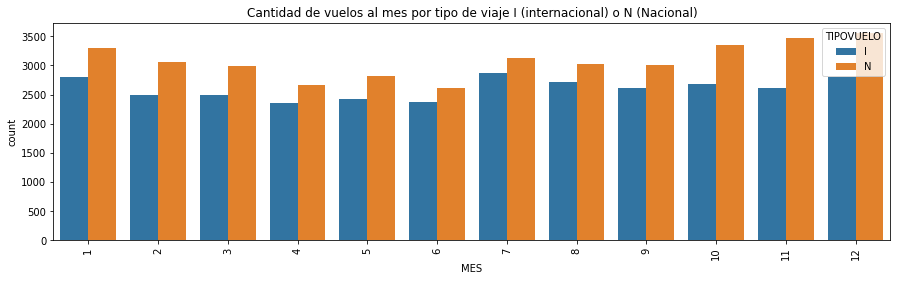

In [152]:
fig, ax = plt.subplots()
ax = sns.countplot(x='MES', hue = 'TIPOVUELO',
    data= df).set(title = 'Cantidad de vuelos al mes por tipo de viaje I (internacional) o N (Nacional)')
fig.set_figwidth(15)
plt.xticks(rotation=90)
fig.show()

/var/folders/5h/wp2by60x2pv7d9tm1_cb98jc0000gn/T/ipykernel_73989/88528808.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


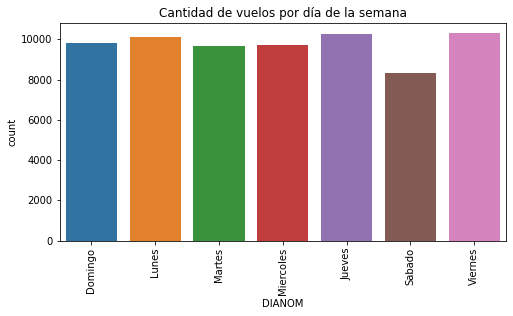

In [149]:
fig, ax = plt.subplots()
ax = sns.countplot(x="DIANOM",
    data= df).set(title = 'Cantidad de vuelos por día de la semana')
fig.set_figwidth(8)
plt.xticks(rotation=90)
fig.show()

/var/folders/5h/wp2by60x2pv7d9tm1_cb98jc0000gn/T/ipykernel_73989/4234342451.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


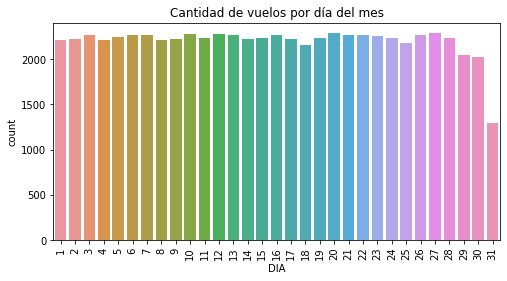

In [154]:
fig, ax = plt.subplots()
ax = sns.countplot(x="DIA",
    data= df).set(title = 'Cantidad de vuelos por día del mes')
fig.set_figwidth(8)
plt.xticks(rotation=90)
fig.show()

#### Respuesta

Hay solo dos casos el año 2018, por lo que no sería útil en el futuro utilizar el año como variable predictora, sino mas bien agrupar por mes.

Todos los vuelos provienen de Santiago

La ciudades de destino las graficaremos, ya que son 62 destinos, y es muy difícil observarlos todos. Los separaremos por unidad de negocio (Internacional - Nacional).

Los 5 destinos **internacionales** más comunes desde SCL son:
- Buenos Aires
- Lima
- Sao Paulo
- Ciudad de Panamá
- Mendoza

Las cinco ciudades son dentro del continente, y más accesibles en términos de precio para escapadas cortas de vacaciones y/o laborales. Esto podría explicar una mayor frecuencia de estos vuelos versus otros que recorren distancias más largas. Además, Lima, Buenos Aires y Sao Paulo tienden a ser aeropuertos de conexión, lo cual también puede explicar una mayor demanda de estas rutas.

Mientras que los 5 destinos **nacionales** más comunes desde SCL son:
- Antofagasta
- Calama
- Puerto Montt
- Concepción
- Temuco

Antofagasta y Calama son ciudades asociadas a la actividad minera en Chile, por lo que es posible que esas rutas tengan una alta demanda por personas de Santiago que trabajan en ese sector productivo. Por otro lado muchas personas que son de Puerto Montt, Concepción y Temuco terminan estudiando o trabajando en Santiago, volviendo recurrentemente a visitar familiares. Es solo una hipótesis, pero podrían ser las razones por las que son rutas tan demandadas.

### 2. Genera las columnas adicionales y luego expórtelas en un archivo synthetic_features.csv :

- temporada_alta : 1 si Fecha-I está entre 15-Dic y 3-Mar, o 15-Jul y 31-Jul, o 11-Sep y 30-Sep, 0 si no.
- dif_min : diferencia en minutos entre Fecha-O y Fecha-I .
- atraso_15 : 1 si dif_min > 15, 0 si no.
- periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I .

In [83]:
# Chequeamos si variable fecha está seteada como tipo fecha
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68205 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68205 non-null  object
 1   Vlo-I      68205 non-null  object
 2   Ori-I      68205 non-null  object
 3   Des-I      68205 non-null  object
 4   Emp-I      68205 non-null  object
 5   Fecha-O    68205 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68205 non-null  object
 8   Des-O      68205 non-null  object
 9   Emp-O      68205 non-null  object
 10  DIA        68205 non-null  int64 
 11  MES        68205 non-null  int64 
 12  AÑO        68205 non-null  int64 
 13  DIANOM     68205 non-null  object
 14  TIPOVUELO  68205 non-null  object
 15  OPERA      68205 non-null  object
 16  SIGLAORI   68205 non-null  object
 17  SIGLADES   68205 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.9+ MB


In [84]:
# Fechas tienen asignado el tipo "Object", por lo que la transformamos a datetime
df[['Fecha-I', 'Fecha-O']] = df[['Fecha-I', 'Fecha-O']].apply(pd.to_datetime)

In [85]:
# Chequeamos que la transformación se hizo correctamente
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68205 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Fecha-I    68205 non-null  datetime64[ns]
 1   Vlo-I      68205 non-null  object        
 2   Ori-I      68205 non-null  object        
 3   Des-I      68205 non-null  object        
 4   Emp-I      68205 non-null  object        
 5   Fecha-O    68205 non-null  datetime64[ns]
 6   Vlo-O      68205 non-null  object        
 7   Ori-O      68205 non-null  object        
 8   Des-O      68205 non-null  object        
 9   Emp-O      68205 non-null  object        
 10  DIA        68205 non-null  int64         
 11  MES        68205 non-null  int64         
 12  AÑO        68205 non-null  int64         
 13  DIANOM     68205 non-null  object        
 14  TIPOVUELO  68205 non-null  object        
 15  OPERA      68205 non-null  object        
 16  SIGLAORI   68205 non-null  object       

In [86]:
# Creamos la variable temporada_alta
import numpy as np
df["temporada_alta"] = np.where((df["Fecha-I"].between("2017-12-15 00:00:00", "2017-12-31 23:59:59") |
                                df["Fecha-I"].between("2017-01-01 00:00:00", "2017-03-03 23:59:59") |
                                df["Fecha-I"].between("2017-07-15 00:00:00", "2017-07-31 23:59:59") |
                                df["Fecha-I"].between("2017-09-11 00:00:00", "2017-09-30 23:59:59")), 1, 0)

# Chequeamos que no haya nada extraño en la construcción de la variable
df['temporada_alta'].value_counts()

0    45444
1    22761
Name: temporada_alta, dtype: int64

In [87]:
print('Un {}% de los vuelos corresponden a vuelos de temporada alta'.format(round(len(df[df['temporada_alta'] == 1]) / len(df) * 100)))

Un 33% de los vuelos corresponden a vuelos de temporada alta


In [88]:
# Creamos la variable dif_min
# La variable indica los minutos de atraso, números negativos implica que el vuelo partió antes
df['dif_min'] = df['Fecha-O'] - df['Fecha-I']
df['dif_min'] = df['dif_min'].astype('timedelta64[m]')

# Chequeamos que no haya nada extraño en la construcción de la variable
df['dif_min'].describe()

count    68205.000000
mean         9.110945
std         19.313514
min        -14.000000
25%         -1.000000
50%          4.000000
75%         12.000000
max        161.000000
Name: dif_min, dtype: float64

In [89]:
# Creamos la variable atraso_15 : 1 si dif_min > 15, 0 si no.
df['atraso_15'] = df['dif_min'].apply(lambda x: 1 if x > 15 else 0)

# Chequeamos que no haya nada extraño en la construcción de la variable
df['atraso_15'].value_counts()

0    55591
1    12614
Name: atraso_15, dtype: int64

In [90]:
print('Un {}% de los vuelos tienen un atraso mayor a 15 minutos'.format(round(len(df[df['dif_min'] > 15]) / len(df) * 100)))

Un 18% de los vuelos tienen un atraso mayor a 15 minutos


In [91]:
#Creamos la variable periodo_dia : mañana (entre 5:00 y 11:59), tarde (entre 12:00 y 18:59) y noche (entre 19:00 y 4:59), en base a Fecha-I .
df.loc[df['Fecha-I'].dt.hour.between(5, 12), 'periodo_dia'] = 'AM'
df.loc[df['Fecha-I'].dt.hour.between(12, 19), 'periodo_dia'] = 'PM1'
df.loc[df['Fecha-I'].dt.hour.between(19, 23), 'periodo_dia'] = 'PM2'
df.loc[df['Fecha-I'].dt.hour.between(00, 5), 'periodo_dia'] = 'PM2'

#Chequeamos que todo este bien, que haya distribución entre value counts y que estén solo los valores especificados
df['periodo_dia'].value_counts()

PM1    25506
AM     22837
PM2    19862
Name: periodo_dia, dtype: int64

In [157]:
print('Del total de vuelos, el {}% tienen horario de departure en la mañana,'.format(round(len(df[df['periodo_dia'] == 'AM']) / len(df) * 100)),
'el {}% tienen horario de departure en la tarde'.format(round(len(df[df['periodo_dia'] == 'PM1']) / len(df) * 100)),
'y el {}% tienen horario de departure en la noche'.format(round(len(df[df['periodo_dia'] == 'PM2']) / len(df) * 100)))

Del total de vuelos, el 33% tienen horario de departure en la mañana, el 37% tienen horario de departure en la tarde y el 29% tienen horario de departure en la noche


In [92]:
# Creamos .csv con data nueva
synthetic_features = df[['temporada_alta', 'dif_min', 'atraso_15', 'periodo_dia']]
synthetic_features.to_csv('synthetic_features.csv', encoding = 'latin1')

### 3. ¿Cómo se compone la tasa de atraso por destino, aerolínea, mes del año, día de la semana, temporada, tipo de vuelo? ¿Qué variables esperarías que más influyeran en predecir atrasos?

In [171]:
def delay_rate(df, grouping_var, width = 15):
    fig, ax = plt.subplots()
    temp = pd.DataFrame(df.groupby(grouping_var)["atraso_15"].sum() / df.groupby(grouping_var).size() * 100).reset_index()
    ax = sns.barplot(x=grouping_var, y=temp[0], data=temp).set(title = 'Tasa de atrasos por {}'.format(grouping_var))
    fig.set_figwidth(width)
    plt.xticks(rotation=90)
    fig.show()
    

/var/folders/5h/wp2by60x2pv7d9tm1_cb98jc0000gn/T/ipykernel_73989/1621500346.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


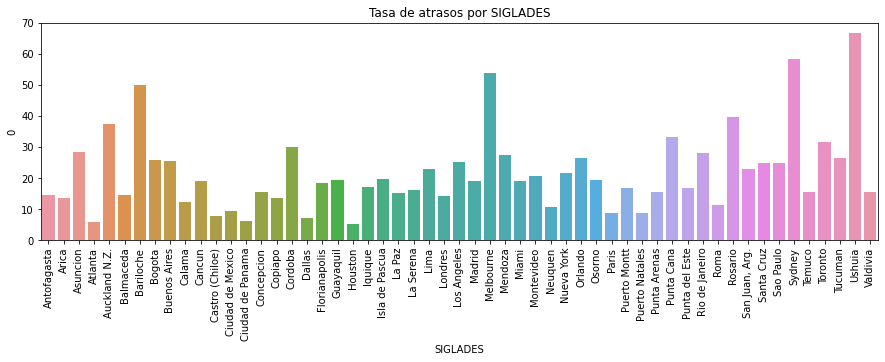

In [172]:
delay_rate(df, 'SIGLADES')

/var/folders/5h/wp2by60x2pv7d9tm1_cb98jc0000gn/T/ipykernel_73989/1621500346.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


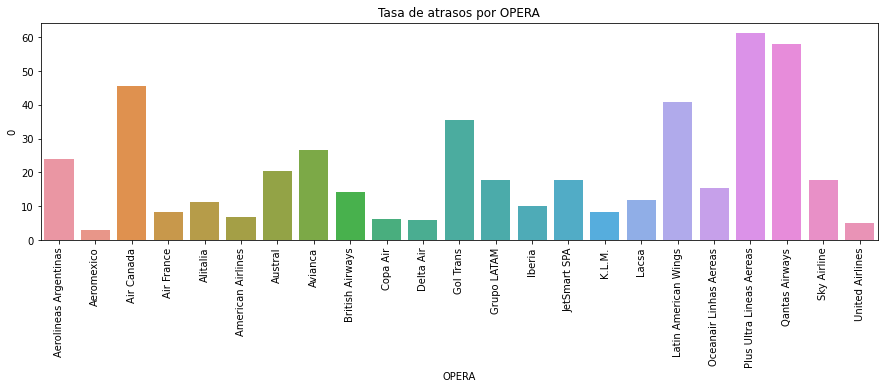

In [173]:
delay_rate(df, 'OPERA')

/var/folders/5h/wp2by60x2pv7d9tm1_cb98jc0000gn/T/ipykernel_73989/1621500346.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


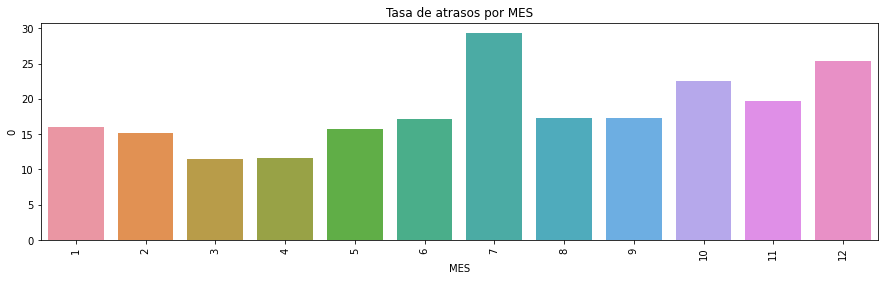

In [174]:
delay_rate(df, 'MES')

/var/folders/5h/wp2by60x2pv7d9tm1_cb98jc0000gn/T/ipykernel_73989/1621500346.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


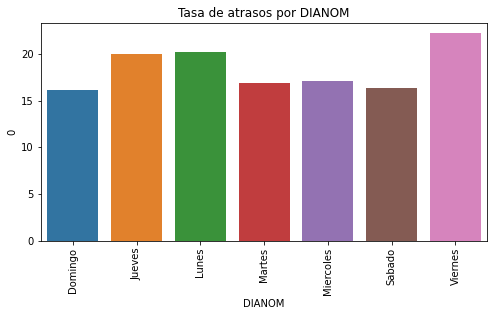

In [176]:
delay_rate(df, 'DIANOM', width = 8)

/var/folders/5h/wp2by60x2pv7d9tm1_cb98jc0000gn/T/ipykernel_73989/1621500346.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


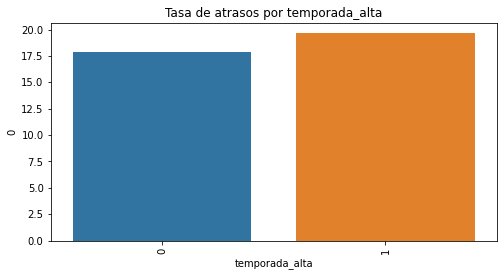

In [177]:
delay_rate(df, 'temporada_alta', width = 8)

/var/folders/5h/wp2by60x2pv7d9tm1_cb98jc0000gn/T/ipykernel_73989/1621500346.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


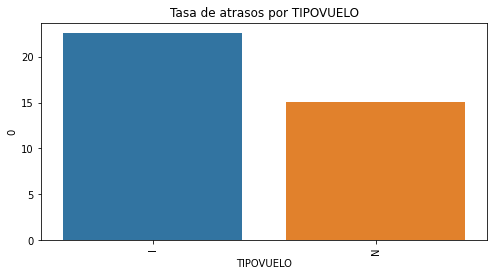

In [178]:
delay_rate(df, 'TIPOVUELO', width = 8)

#### Respuesta

A partir del análisis anterior surgen las siguientes ideas por explorar:
- Vimos que habían destinos donde alrededor de un 100% de los vuelos sufrían atrasos de 15 minutos o más, ¿hay patrones comunes entre esos destinos en cuanto a fecha/horario o aerolíneas que operan esos vuelos? 
- Vimos que habían destinos donde ninguno de los vuelos sufrían atrasos de 15 minutos o más, ¿hay patrones comunes entre esos destinos en cuanto a fecha/horario o aerolíneas que operan esos vuelos? 
- ¿Cómo distribuyen los atrasos en las horas del día? ¿Hay alguna relación entre atrasos y la cantidad de vuelos que hay simultáneamente en curso?


* Crear features de vuelos simultáneos y vuelos simultáneos operados por la misma aerolínea

In [100]:
# obtenemos la lista de destinos que tienen una tasa de atraso de más de un 90%
temp = pd.DataFrame(df.groupby('SIGLADES')["atraso_15"].sum() / df.groupby('SIGLADES').size() * 100).reset_index()
most_delayed_destinies = temp['SIGLADES'][temp.iloc[:,1] > 90].tolist()
most_delayed_destinies

['Cochabamba', 'Puerto Stanley', 'Quito']

In [101]:
# obtenemos cuántos vuelos hay en cada uno de esos destinos
df[df['SIGLADES'].isin(most_delayed_destinies)].groupby('SIGLADES').size()

SIGLADES
Cochabamba        1
Puerto Stanley    1
Quito             2
dtype: int64

In [102]:
# y qué compañía los opera
df[df['SIGLADES'].isin(most_delayed_destinies)].groupby('OPERA').size()

OPERA
Grupo LATAM    4
dtype: int64

LATAM opera todos los vuelos con tasa de retraso cercano al 100%, sin embargo son solo 4 vuelos en todel data set que comprende todo el año 2017 y dos vuelos del año 2018. Por lo tanto aunque estos destinos tengan una alta tasa de retraso, son muy poco frecuentes como para querer generar un impacto allí. Esto permite inferir que puede ser importante considerar que tan frecuente un destino es operado a la hora de predecir el retraso de los vuelos. Es posible que los vuelos menos frecuentes, sean menos prioritarios y por ende suelen atrasarse más. También, dependiendo de lo que se busque lograr con la predicción, podría ser pertinente eliminar del dataset los destinos que son altamente infrecuentes.

In [103]:
# obtenemos la lista de destinos que tienen una tasa de atraso de más de un 1%
least_delayed_destinies = temp['SIGLADES'][temp.iloc[:,1] < 1].tolist()
least_delayed_destinies

['Cataratas Iguacu', 'Curitiba, Bra.', 'Pisco, Peru', 'Washington']

In [104]:
# obtenemos cuántos vuelos hay en cada uno de esos destinos
df[df['SIGLADES'].isin(least_delayed_destinies)].groupby('SIGLADES').size()

SIGLADES
Cataratas Iguacu    2
Curitiba, Bra.      3
Pisco, Peru         1
Washington          1
dtype: int64

In [105]:
# y qué compañía los opera
df[df['SIGLADES'].isin(least_delayed_destinies)].groupby('OPERA').size()

OPERA
Grupo LATAM               5
Oceanair Linhas Aereas    1
United Airlines           1
dtype: int64

In [106]:
# Eliminaremos los casos extremos de los datos
df = df[(~df['SIGLADES'].isin(least_delayed_destinies)) & (~df['SIGLADES'].isin(most_delayed_destinies))]
df.shape

(68194, 22)

In [107]:
# Construcción de nuevas variables

#Creamos variable auxiliar para integrar las nuevas variables al dataframe
df['Fecha-I-aux'] = df['Fecha-I'].dt.strftime('%Y-%m-%d %H')

# Construimos la variable de cantidad de vuelos durante una hora
sim_flights_hour = pd.DataFrame(df.groupby(['Fecha-I-aux']).size()).reset_index()
df = df.merge(sim_flights_hour, how='left', on = 'Fecha-I-aux')
df = df.rename(columns = {0: 'SIM-VUELOS-HORA'})

In [109]:
# Borramos columna auxiliar
df = df.drop('Fecha-I-aux', axis = 1)

In [110]:
#Chqueamos que hicimos join correcto confirmando el número de filas
df.shape

(68194, 24)

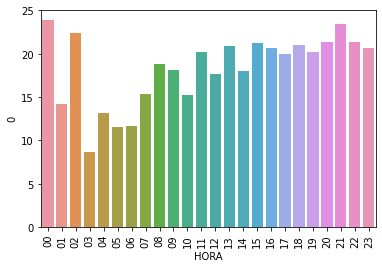

In [111]:
# Creamos la variable horas para chequear tasa de atrasos por hora
df['HORA'] = pd.to_datetime(df['Fecha-I']).dt.strftime('%H')

#Calculamos la tasa de atrasos en horas
delay_rate(df, 'HORA', width = 8)

Vemos que hay variaciones de la tasa de atrasos durante las diferentes horas del día, por lo que también podría ayudar a realizar una predicción.

/var/folders/5h/wp2by60x2pv7d9tm1_cb98jc0000gn/T/ipykernel_73989/576601139.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


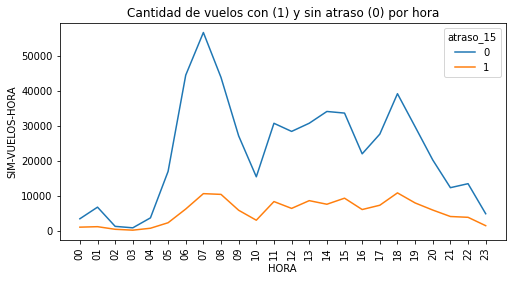

In [180]:
fig, ax = plt.subplots()
ax = sns.lineplot(x = 'HORA', y = 'SIM-VUELOS-HORA', hue = 'atraso_15', data = df.groupby(['HORA', 'atraso_15']).sum(), ci=None).set(title = 'Cantidad de vuelos con (1) y sin atraso (0) por hora')
fig.set_figwidth(8)
plt.xticks(rotation=90)
fig.show()

In [113]:
df['LATAM'] = df['OPERA'].apply(lambda x: 1 if x == 'Grupo LATAM' else 0)

/var/folders/5h/wp2by60x2pv7d9tm1_cb98jc0000gn/T/ipykernel_73989/3288833536.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


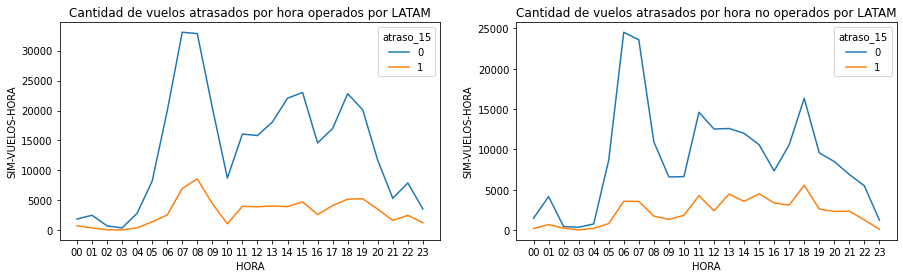

In [181]:
fig, ax =plt.subplots(1,2)
sns.lineplot(x = 'HORA', y = 'SIM-VUELOS-HORA', hue = 'atraso_15',
                    data = df[df['LATAM']==1].groupby(['atraso_15', 'HORA']).sum(), 
                    ci=None,
                    ax = ax[0]).set(title = 'Cantidad de vuelos atrasados por hora operados por LATAM')

sns.lineplot(x = 'HORA', y = 'SIM-VUELOS-HORA', hue = 'atraso_15',
                    data = df[df['LATAM']==0].groupby(['atraso_15', 'HORA']).sum(), 
                    ci=None,
                    ax = ax[1]).set(title = 'Cantidad de vuelos atrasados por hora no operados por LATAM')

fig.set_figwidth(15)
fig.show()

/var/folders/5h/wp2by60x2pv7d9tm1_cb98jc0000gn/T/ipykernel_73989/74780235.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


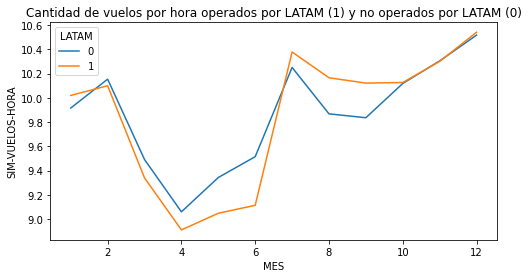

In [187]:
fig, ax =plt.subplots()
sns.lineplot(x = 'MES', y = 'SIM-VUELOS-HORA', hue = 'LATAM',
                    data = df, 
                    ci=None).set(title = 'Cantidad de vuelos por hora operados por LATAM (1) y no operados por LATAM (0)')

fig.set_figwidth(8)
fig.show()

/Users/alejandra/miniforge3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


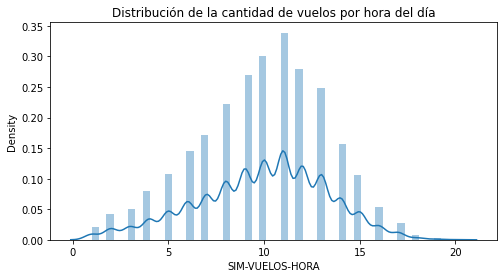

In [189]:
# Basic correlogram
fig, ax =plt.subplots()

sns.distplot(df['SIM-VUELOS-HORA']).set(title = 'Distribución de la cantidad de vuelos por hora del día')

fig.set_figwidth(8)
plt.show()

In [118]:
df.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'temporada_alta', 'dif_min',
       'atraso_15', 'periodo_dia', 'SIM-VUELOS-HORA', 'SIM-VUELOS-HORA-OPERA',
       'HORA', 'LATAM'],
      dtype='object')

#### Conclusiones del análisis adicional

Como ambas variables tienen un comportamiento similar en relación al atraso y respecto de las compañías que operan los vuelos, nos quedaremos solo con la cantidad de vuelos simultáneos, porque distribuye normalmente

### 4. Entrena uno o varios modelos (usando el/los algoritmo(s) que prefieras) para estimar la probabilidad de atraso de un vuelo. Siéntete libre de generar variables adicionales y/o complementar con variables externas.

In [119]:
#!pip install sklearn

In [120]:
# Ajustamos el dataset para que pueda ser utilizado como data de entrenamiento
# Primero convertimos las variables categóricas a dummy
from sklearn.preprocessing import OneHotEncoder

# Para no generar más problemas de dimensionalidad, utilizaremos la variable que indica si el vuelo es LATAM o no, 
# en lugar de utilizar la aerolínea en particular que opera el vuelo
features = ['SIGLADES', 'LATAM', 'MES', 'DIA', 'DIANOM', 'TIPOVUELO', 'periodo_dia', 'temporada_alta', 'SIM-VUELOS-HORA']
features_dummy = ['SIGLADES', 'TIPOVUELO', 'periodo_dia', 'DIANOM']

one_hot = OneHotEncoder(sparse=False, handle_unknown='ignore',drop = 'if_binary')
df_dummy = one_hot.fit_transform(df[features_dummy])

#Converting back to a dataframe
df_dummy = pd.DataFrame(df_dummy, columns = one_hot.get_feature_names())
#Generamos un dataset con features y otro con la variable predictos
x = pd.concat([df[['SIM-VUELOS-HORA', 'LATAM', 'MES', 'DIA', 'temporada_alta']], df_dummy], axis=1)
y = df["atraso_15"]

# Normalmente se debe estandarizar las variables numéricas para que estén en la misma escala pero en este caso solo tenemos una que es numérica por lo que  
# no es necesario ('SIM-VUELOS-HORA)

/Users/alejandra/miniforge3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


A continuación probaremos los siguientes modelos de clasificación para predecir si un vuelo tendrá un atraso de más de 15 minutos o no. Si bien al tener mayoritariamente variables categóricas que se deben convertir en dummies, aumenta la multicolinearidad, este no es un problema para la performance del modelo, sin embargo si complica la interpretabilidad, ya que no podremos aislar bien el efecto de cada variable independiente sobre la variable dependiente.

Como vemos a continuación, los datos están desbalanceados, la cantidad de casos que hay de vuelos sin atrasos es alrededor de cuatro veces más que la cantidad de casos de vuelos con atrasos. Por esta razón, procederemos a balancear las clases, ya que de no hacerlo estaremos sesgando el entrenamiento. El balanceo de clases solo se aplica a la data de entrenamiento, ya que el objetivo del testeo es ver cómo opera el modelo con la data en sus proporciones originales. Así, primero separaremos el dataset en dos, uno para entrenamiento y otro para testeo, y luego balancearemos las clases solo en el dataset de entrenamiento

Se puede balancear la data inventando data ficticia para aumentar los casos de la categoría subrepresentada, o quitando casos para disminuir la categoría sobrerepresentada. En este caso haremos lo primero, ya que la cantidad de datos no permite hacer lo segundo y mantener un buen número de casos para el entrenamiento.



/var/folders/5h/wp2by60x2pv7d9tm1_cb98jc0000gn/T/ipykernel_73989/600244456.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


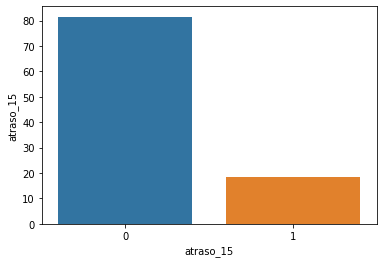

In [121]:
sns.barplot(x='atraso_15', y="atraso_15", data=df, estimator=lambda x: len(x) / len(df) * 100)
fig.show()

In [122]:
#%pip install imblearn
#import sklearn

In [123]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 10)

sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

#### Regresión Logística

In [124]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid = {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['liblinear']}

# Create grid search object
clf = GridSearchCV(LogisticRegression(), param_grid = grid, cv = 10, verbose=True)

# Fit on data
best_clf = clf.fit(X_train, y_train)
best_clf.best_estimator_


Fitting 10 folds for each of 40 candidates, totalling 400 fits


LogisticRegression(C=0.23357214690901212, penalty='l1', solver='liblinear')

In [125]:
selected_clf = LogisticRegression(C=0.23357214690901212, penalty='l1', solver='liblinear')
model_res = selected_clf.fit(X_train_res, y_train_res)
model_pred = model_res.predict(X_test)

In [126]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
print('Classificiation Report')
print('---------------------')
print(classification_report(y_test, model_pred))

Classificiation Report
---------------------
              precision    recall  f1-score   support

           0       0.86      0.62      0.72     11081
           1       0.26      0.57      0.35      2558

    accuracy                           0.61     13639
   macro avg       0.56      0.60      0.54     13639
weighted avg       0.75      0.61      0.65     13639



#### Random Forest

In [127]:
from sklearn.ensemble import RandomForestClassifier

grid = {'n_estimators': [100, 200, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy', 'log_loss']}

rf = GridSearchCV(RandomForestClassifier(), param_grid = grid, cv = 10, verbose=True)

# Fit on data
best_rf = rf.fit(X_train, y_train)
best_rf.best_estimator_


Fitting 10 folds for each of 90 candidates, totalling 900 fits


RandomForestClassifier(max_depth=8)

In [128]:

selected_forest = RandomForestClassifier(max_depth=8, n_estimators=500)
model_res = selected_forest.fit(X_train_res, y_train_res)
model_pred = model_res.predict(X_test)

In [129]:
print('Classificiation Report')
print('---------------------')
print(classification_report(y_test, model_pred))

Classificiation Report
---------------------
              precision    recall  f1-score   support

           0       0.84      0.82      0.83     11081
           1       0.29      0.32      0.31      2558

    accuracy                           0.73     13639
   macro avg       0.56      0.57      0.57     13639
weighted avg       0.74      0.73      0.73     13639



#### Bernoulli Naive Bayes
Existen diferentes modelos Naive Bayes, cada uno asume diferentes distribuciones de la variable dependiente. En este caso nuestra variable predictora es binaria, por lo que lo correcto sería utilizar Bernoulli

In [130]:
from sklearn.naive_bayes import BernoulliNB

grid = {
    'fit_prior': (True, False)
}

bnb = GridSearchCV(BernoulliNB(), param_grid=grid, verbose=1, cv=10)
bnb.fit(X_train, y_train)
bnb.best_estimator_

Fitting 10 folds for each of 2 candidates, totalling 20 fits


BernoulliNB()

In [131]:
selected_bnb = BernoulliNB()
model_res = selected_bnb.fit(X_train_res, y_train_res)
model_pred = model_res.predict(X_test)

In [132]:
print('Classificiation Report')
print('---------------------')
print(classification_report(y_test, model_pred))

Classificiation Report
---------------------
              precision    recall  f1-score   support

           0       0.85      0.72      0.78     11081
           1       0.26      0.43      0.32      2558

    accuracy                           0.67     13639
   macro avg       0.55      0.57      0.55     13639
weighted avg       0.74      0.67      0.69     13639



#### KNN

In [133]:
from sklearn.neighbors import KNeighborsClassifier


grid = {
    'n_neighbors': (3, 5, 7),
    'weights': ('uniform', 'distance'),
    'leaf_size': (20, 30, 40),
    'metric': ('minkowski', 'jaccard', 'euclidean')
}

knn = GridSearchCV(KNeighborsClassifier(), param_grid=grid, verbose=1, cv=10)
knn.fit(X_train, y_train)
knn.best_estimator_


Fitting 10 folds for each of 54 candidates, totalling 540 fits


/Users/alejandra/miniforge3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1975: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/alejandra/miniforge3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1975: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/alejandra/miniforge3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1975: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/alejandra/miniforge3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1975: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/Users/alejandra/miniforge3/lib/python3.9/site-packages/sklearn/metrics/pairwise.py:1975: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.war

KNeighborsClassifier(leaf_size=20, n_neighbors=7)

In [190]:
selected_knn = KNeighborsClassifier(leaf_size=20, n_neighbors=7)
model_knn = selected_knn.fit(X_train_res, y_train_res)
model_knn_pred = model_knn.predict(X_test)

In [191]:
print('Classificiation Report')
print('---------------------')
print(classification_report(y_test, model_knn_pred))

Classificiation Report
---------------------
              precision    recall  f1-score   support

           0       0.87      0.60      0.71     11081
           1       0.26      0.59      0.36      2558

    accuracy                           0.60     13639
   macro avg       0.56      0.60      0.53     13639
weighted avg       0.75      0.60      0.64     13639

